In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors

In [2]:
spotify = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/spotify/data.csv')
categories = spotify.columns
categories
selection = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo',
       'valence', 'year']
data = spotify[selection]
mode_enum = enumerate(["minor", "major"])
data[data.year>50].describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a0cea67b8>,
      dtype=object)

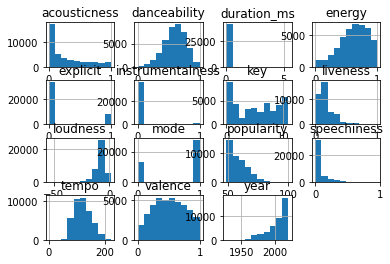

In [3]:
data[data.popularity>48].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a0c85e2b0>,
      dtype=object)

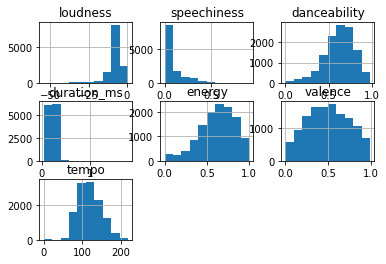

In [4]:
filtered=data[(data.popularity>62) & (data.year >= 1950)]
filtered[["loudness", "speechiness", "danceability", "duration_ms", "energy", "valence", "tempo"]].hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a0c0ab4a8>,
      dtype=object)

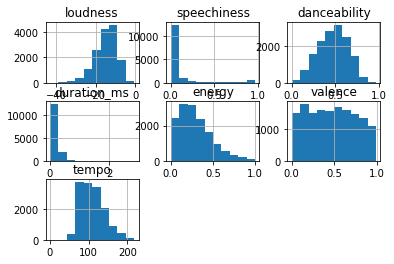

In [5]:
filtered=data[(data.popularity<12) & (data.year >= 1950)]
filtered[["loudness", "speechiness", "danceability", "duration_ms", "energy", "valence", "tempo"]].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a0c8fc6a0>,
      dtype=object)

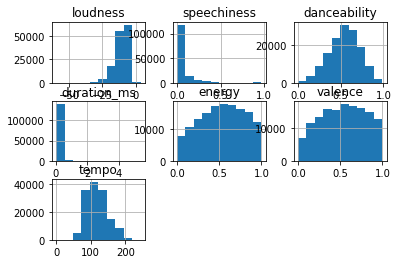

In [6]:
filtered=data[(data.year >= 1950)]
filtered[["loudness", "speechiness", "danceability", "duration_ms", "energy", "valence", "tempo"]].hist()


loudness - first factor of importance
    speechiness - second factor
    dancibility - third factor
	tempo - fourth
	valence - fifth
	energy - sixth
	duration - seventh


loudness
speechiness 
dancibility
tempo
valence
energy
duration



In [7]:
categories =["loudness",
             "speechiness",
             "danceability",
             "tempo",
             "valence",
             "energy",
             "duration_ms"]
category = categories[0]
X=data["speechiness"]
y=data["popularity"]


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

n_neighbors=5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
knn = neighbors.KNeighborsRegressor(n_neighbors)
#knn.fit(X_train, y_train)
#predictions = knn.predict(X_test)
#cm = confusion_matrix(y_test, predictions)
#print(cm)

In [9]:
#Array([1,2,3]).reshape(-1,1)

In [10]:
#np.array[1,2,3]

In [11]:
#before 1950, we don't have as much data.
focus_data = data[data.year >=1950]
flop_max_popularity = focus_data.popularity.describe()["25%"]
hit_min_popularity = focus_data.popularity.describe()["75%"]
flops = focus_data[focus_data.popularity <= flop_max_popularity]
hits = focus_data[focus_data.popularity >= hit_min_popularity]
med = focus_data[(focus_data.popularity < hit_min_popularity) & (focus_data.popularity>flop_max_popularity)]
selection=["loudness", "speechiness", "danceability", "duration_ms", "energy", "valence", "tempo"]

In [12]:
focus_data.describe()
focus_data.hist()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,141606.000000,141606.000000,1.416060e+05,141606.000000,141606.000000,141606.000000,141606.000000,141606.000000,141606.000000,141606.000000,141606.000000,141606.000000,141606.000000,141606.000000,141606.000000
mean,0.418745,0.544084,2.355960e+05,0.533821,0.088400,0.124715,5.196863,0.203881,-10.621787,0.710259,37.490488,0.079447,118.488379,0.533218,1984.929586
std,0.353902,0.174292,1.137655e+05,0.260522,0.283877,0.275612,3.522199,0.179089,5.387874,0.453643,18.495975,0.106717,30.390589,0.261642,20.446156
min,0.000000,0.000000,8.853000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,0.062100,0.427000,1.755330e+05,0.327000,0.000000,0.000000,2.000000,0.095800,-13.442000,0.000000,25.000000,0.034000,95.074250,0.324000,1967.000000
50%,0.351000,0.553000,2.172000e+05,0.544000,0.000000,0.000083,5.000000,0.131000,-9.698000,1.000000,38.000000,0.043500,116.151000,0.542000,1985.000000
75%,0.768000,0.670000,2.688978e+05,0.747000,0.000000,0.022800,8.000000,0.257000,-6.637000,1.000000,51.000000,0.070700,137.341750,0.751000,2003.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,100.000000,0.968000,244.091000,1.000000,2020.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a07686198>,
      dtype=object)

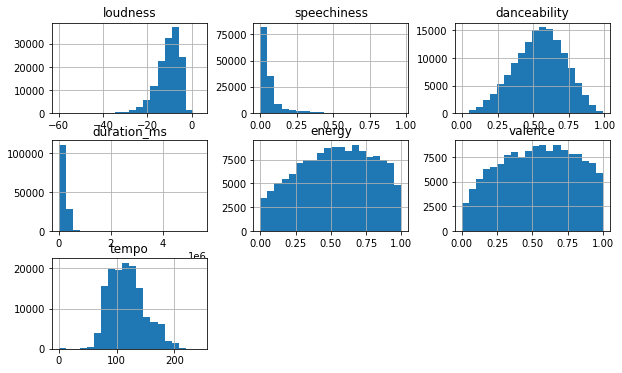

In [37]:
focus_data[selection].hist(bins=20, figsize=(10,6))

In [38]:
flops[selection].describe()

,loudness,speechiness,danceability,duration_ms,energy,valence,tempo
count,36136.000000,36136.000000,36136.000000,3.613600e+04,36136.000000,36136.000000,36136.000000
mean,-13.758603,0.083528,0.489996,2.234587e+05,0.369797,0.516983,113.696850
std,5.353969,0.145853,0.164336,1.438738e+05,0.234472,0.270207,30.698277
min,-60.000000,0.000000,0.000000,8.853000e+03,0.000000,0.000000,0.000000
25%,-16.757000,0.034800,0.376000,1.512670e+05,0.183000,0.290000,89.924000
50%,-12.997000,0.042500,0.501000,1.872175e+05,0.328000,0.529000,111.105500
75%,-9.982750,0.060900,0.610000,2.484670e+05,0.524000,0.743000,132.544000
max,1.812000,0.968000,0.982000,3.557955e+06,1.000000,0.993000,218.443000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a07240eb8>,
      dtype=object)

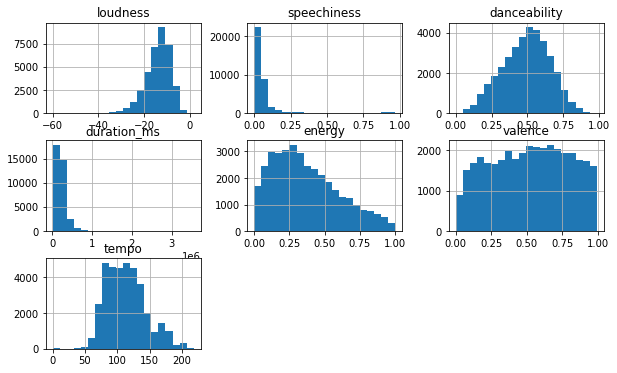

In [39]:
flops[selection].hist(bins=20, figsize=(10,6))

In [40]:
hits[selection].describe()

,loudness,speechiness,danceability,duration_ms,energy,valence,tempo
count,35841.000000,35841.000000,35841.000000,3.584100e+04,35841.000000,35841.000000,35841.000000
mean,-8.016895,0.089064,0.597016,2.317667e+05,0.622933,0.511305,120.475913
std,4.639668,0.096281,0.170035,7.392346e+04,0.223877,0.250576,30.233445
min,-54.376000,0.000000,0.000000,3.030100e+04,0.000020,0.000000,0.000000
25%,-9.576000,0.034500,0.490000,1.913080e+05,0.479000,0.314000,96.477000
50%,-6.906000,0.047600,0.608000,2.229870e+05,0.649000,0.509000,119.896000
75%,-5.114000,0.094400,0.721000,2.598660e+05,0.798000,0.712000,140.013000
max,1.342000,0.955000,0.988000,4.120258e+06,1.000000,0.993000,220.099000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a06fc8588>,
      dtype=object)

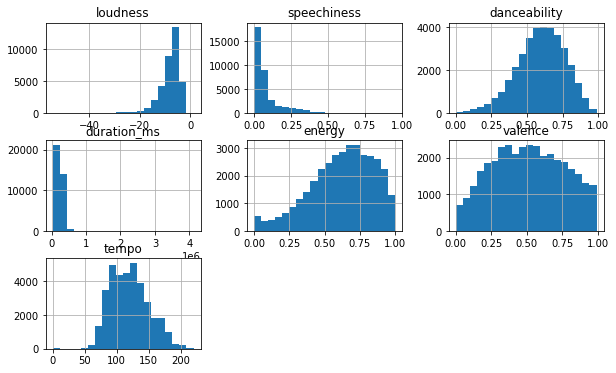

In [41]:
hits[selection].hist(bins=20, figsize=(10,6))

In [42]:
med[selection].describe()

,loudness,speechiness,danceability,duration_ms,energy,valence,tempo
count,69629.000000,69629.000000,69629.000000,6.962900e+04,69629.000000,69629.000000,69629.000000
mean,-10.334693,0.072378,0.544908,2.438660e+05,0.573076,0.552924,119.952014
std,4.939540,0.085106,0.172978,1.123121e+05,0.253203,0.261227,30.044508
min,-60.000000,0.000000,0.000000,1.470800e+04,0.000000,0.000000,0.000000
25%,-12.933000,0.033300,0.427000,1.830670e+05,0.385000,0.345000,96.715000
50%,-9.587000,0.042600,0.553000,2.272400e+05,0.586000,0.566000,117.364000
75%,-6.768000,0.068100,0.670000,2.800130e+05,0.785000,0.773000,138.247000
max,3.744000,0.964000,0.986000,5.403500e+06,1.000000,1.000000,244.091000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a06a5d5c0>,
      dtype=object)

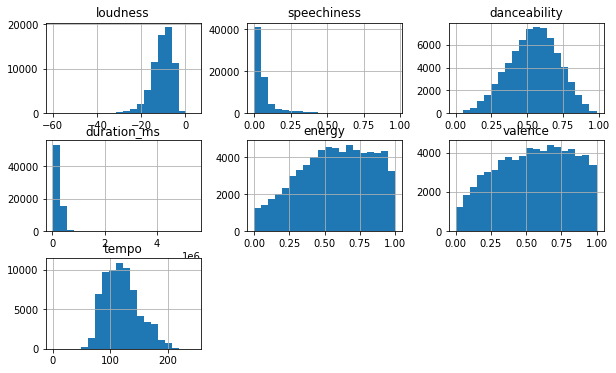

In [43]:
med[selection].hist(bins=20, figsize=(10,6))

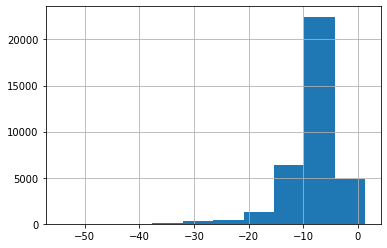

In [20]:
hits.loudness.hist()

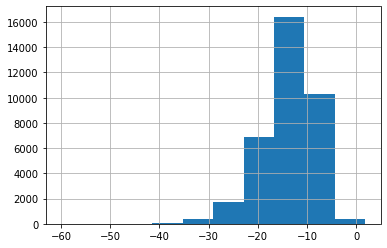

In [21]:
flops.loudness.hist()

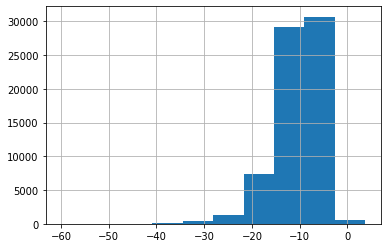

In [22]:
med.loudness.hist()

In [23]:

data

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.9950,0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928
1,0.9940,0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928
2,0.6040,0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928
3,0.9950,0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928
4,0.9900,0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,75,0.1430,100.012,0.3060,2020
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,64,0.0403,128.000,0.2700,2020
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,70,0.1050,123.700,0.1530,2020
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,70,0.0385,129.916,0.4720,2020


[MMC Entertainment is a real company that publishes rap.](https://sound.mmcentertainments.com/). Let's see what's the deal with rap...

In [24]:
genres_url = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/spotify/data_by_genres.csv"
genres = pd.read_csv(genres_url)

In [25]:
genres

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,zolo,0.218600,0.560365,2.675453e+05,0.611985,0.152665,0.190792,-11.499268,0.064295,123.283566,0.596705,33.760410,9,1
2660,zouglou,0.124000,0.834000,2.951470e+05,0.674000,0.000000,0.082800,-13.455000,0.072100,119.039000,0.951000,56.000000,7,0
2661,zouk,0.233181,0.752762,2.951100e+05,0.627238,0.301195,0.083224,-10.864476,0.038110,101.681762,0.844381,42.476190,4,1
2662,zouk riddim,0.052700,0.776000,2.293330e+05,0.656000,0.565000,0.044500,-14.316000,0.034100,99.981000,0.966000,24.000000,4,1


In [26]:
focused_genres = genres[["rap" in mystring and "trap" not in mystring for mystring in genres.genres]]

In [27]:
focused_genres

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
38,alabama rap,0.135907,0.700989,214143.784299,0.604970,0.000394,0.166815,-6.691861,0.216182,115.679613,0.422011,51.088528,2,1
210,baton rouge rap,0.127731,0.761996,231226.714634,0.673053,0.005219,0.159045,-6.212104,0.193147,124.756171,0.534798,50.063471,1,1
211,battle rap,0.064944,0.696560,261996.591256,0.750185,0.000369,0.278712,-5.595859,0.253637,102.672170,0.549333,49.475504,6,1
359,cali rap,0.145045,0.769562,199691.360244,0.607612,0.009473,0.175336,-7.679128,0.212089,109.027380,0.490691,57.252206,1,1
454,chicago rap,0.181652,0.682339,238659.111951,0.664544,0.042546,0.205033,-6.888705,0.195333,118.660081,0.525765,53.926357,1,1
457,chicano rap,0.168765,0.766517,257757.874135,0.615836,0.009408,0.184926,-7.570751,0.172449,109.046074,0.591950,42.785614,1,1
601,comedy rap,0.159674,0.737401,236403.919534,0.633933,0.000308,0.145489,-8.151758,0.210989,119.963947,0.661925,47.838731,7,1
637,country rap,0.147160,0.701270,242836.052775,0.692902,0.003697,0.188436,-6.523297,0.125333,120.467277,0.496323,52.765917,11,1
791,dfw rap,0.157647,0.755669,256442.373962,0.654044,0.001343,0.150593,-7.063801,0.222752,139.734632,0.558965,50.592441,4,1
795,dirty south rap,0.095788,0.743053,261435.716051,0.673437,0.004560,0.216089,-6.561651,0.202828,123.506296,0.568768,46.859448,1,1


In [28]:
focused_genres[selection].describe()

,loudness,speechiness,danceability,duration_ms,energy,valence,tempo
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,-7.425515,0.170631,0.693144,236096.273572,0.648541,0.546529,118.153361
std,2.249372,0.071814,0.110091,33074.288942,0.121720,0.134382,14.087385
min,-17.809000,0.034600,0.310000,165242.148816,0.169125,0.123000,70.231000
25%,-7.679128,0.133331,0.682339,214143.784299,0.606000,0.486409,109.027380
50%,-6.970304,0.177477,0.722333,237397.077778,0.666648,0.549333,118.206990
75%,-6.449483,0.224494,0.755669,260823.095833,0.693348,0.614000,126.113815
max,-4.007000,0.289915,0.893000,357227.000000,0.902000,0.800833,169.988000
